# 大数の弱法則

In [97]:
from shiori.utils.viewer import set_plot_params, sns, plt
from shiori.utils.path import ProjectPath
from pathlib import Path
import numpy as np
from matplotlib import animation
from math import gamma
from scipy.stats import chi2, cauchy, norm, t
import math
import polars as pl
from itertools import chain
set_plot_params()
name = Path().cwd().name + "/weak_law_of_large_numbers"
proj = ProjectPath(save_dst=name)
save_dir = proj.save_dir
save_dir.mkdir(parents=True, exist_ok=True)
plt.rcParams.update({
    "text.usetex": True,               # LaTeXを使う
    "font.family": "Arial",            # セリフ体
    "font.serif": ["Computer Modern"], # LaTeX標準フォント
})


# 標準正規分布

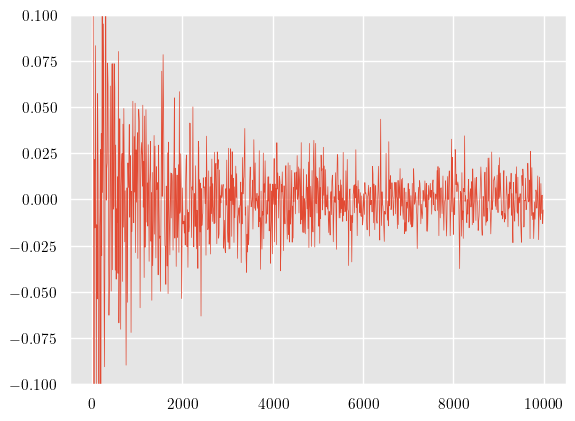

In [48]:
ns = np.arange(1, 10000, 10)
norm_means = []
for n in ns:
    norm_samples = np.random.normal(loc=0, scale=1, size=n)
    norm_means.append(norm_samples.mean())
plt.plot(ns,norm_means, linewidth=0.5)
plt.ylim(-0.1, 0.1)
plt.show()

# コーシー分布からのサンプリング

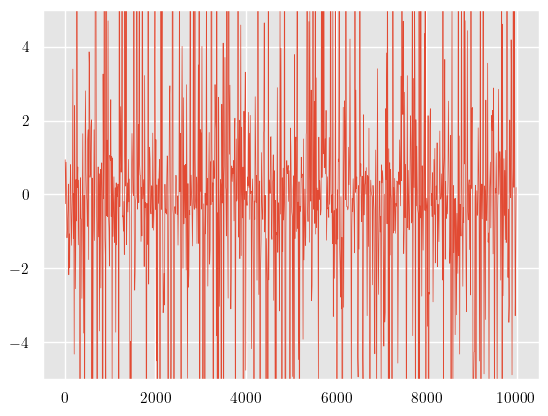

In [53]:
ns = np.arange(1, 10000, 10)
norm_means = []
for n in ns:
    norm_samples = np.random.standard_cauchy(size=n)
    norm_means.append(norm_samples.mean())
plt.plot(ns,norm_means, linewidth=0.5)
plt.ylim(-5,5)
plt.show()

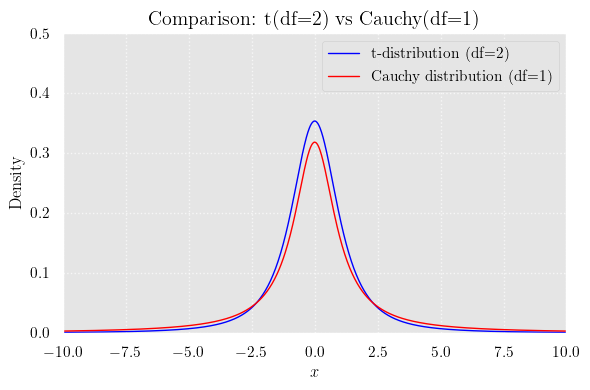

In [106]:
x = np.linspace(-10, 10, 1000)

# t分布（自由度2）
y_t2 = t.pdf(x, df=2)

# コーシー分布（t分布の自由度1）
y_cauchy = cauchy.pdf(x, loc=0, scale=1)

plt.figure(figsize=(6,4))
plt.plot(x, y_t2, color="blue", lw=1, label="t-distribution (df=2)")
plt.plot(x, y_cauchy, color="red", lw=1, label="Cauchy distribution (df=1)")
plt.title("Comparison: t(df=2) vs Cauchy(df=1)")
plt.xlabel("$x$")
plt.ylabel("Density")
plt.xlim(-10, 10)
plt.ylim(0, 0.5)
plt.grid(True, linestyle=":", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig(save_dir.joinpath("t_pdf.png"), dpi=300, facecolor="white")
plt.show()

In [116]:
# --- 設定 ---
n_total = 10000
step = 500
frames = np.arange(1, n_total+1, step)
ylim = (-10, 10)                      # 見やすさ用（t1 はしばしば飛び出す）

# --- サンプリング ---
t1 = np.random.standard_t(df=1, size=n_total)  # = コーシー
t2 = np.random.standard_t(df=2, size=n_total)

# --- 逐次平均 ---
mean_t1 = np.cumsum(t1) / np.arange(1, n_total + 1)
mean_t2 = np.cumsum(t2) / np.arange(1, n_total + 1)

# --- 描画 ---
fig, ax = plt.subplots(figsize=(7,4))
ax.set_xlim(0, n_total)
ax.set_ylim(*ylim)
ax.set_xlabel("Sample size n")
ax.set_ylabel("Sample mean")
ax.set_title("Running mean: t(df=1) vs t(df=2)")
line1, = ax.plot([], [], color='red',  lw=1, label="t(df=1) = Cauchy")
line2, = ax.plot([], [], color='blue', lw=1, label="t(df=2)")
ax.axhline(0, color='black', linestyle='--', lw=1)
ax.legend()

def update(frame):
    line1.set_data(np.arange(1, frame+1), mean_t1[:frame])
    line2.set_data(np.arange(1, frame+1), mean_t2[:frame])
    return line1, line2

ani = animation.FuncAnimation(fig, update, frames=frames, interval=1, blit=True)
ani.save(save_dir.joinpath("weaklaw.gif"), writer="pillow", fps=120)
plt.close()
